In [1]:
import torch
from torch import nn
from mltools import ld,draw,models,MachineLearning
from d2l import torch as d2l

In [2]:
train_iter, vocab = d2l.load_data_time_machine(batch_size=32, num_steps=35)
rnn_layer=nn.LSTM(len(vocab), hidden_size=512, num_layers=1, batch_first=True, bidirectional=True) # 定义循环网络LSTM
model=models.RNNModel(rnn_layer, vocab_size=len(vocab)) # 定义训练模型
device=torch.device('cuda')

class LSTMTMMachineLearning(MachineLearning):
    def set_animator(self, num_epochs):
        self.animator = draw.Animator(line_num=1,xlabel='epoch',ylabel='loss',xlim=[0, num_epochs+1],ylim=-0.1,legend=['train loss'])

    def train_epoch(self):
        '''一个迭代周期'''
        self.timer.start()
        self.calculate_train_iter() # 计算训练集
        self.timer.stop()
        self.output_print()
        self.animator.add(self.train_loss) # 添加损失值

    def transform_y(self, y):
        '''转换y'''
        return y.reshape(-1).to(self.device)

    def calculate_model(self, x):
        '''计算神经网络'''
        y, _ = self.model(x)
        return y
    
    def grad_update(self, loss):
        '''梯度更新'''
        self.optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1, norm_type=2)
        self.optimizer.step()

    def output_print(self):
        '''打印输出值'''
        print(f'train loss {self.train_loss:.3f}')
        print(f'{self.timer.sum() / self.num_epoch:.1f} sec/epoch on {str(self.device)}')

ml = LSTMTMMachineLearning(model,train_iter,device=device)
model_path='../model/LSTM_TM.pth' # 模型保存路径

train loss 0.089
0.1 sec/epoch on cuda


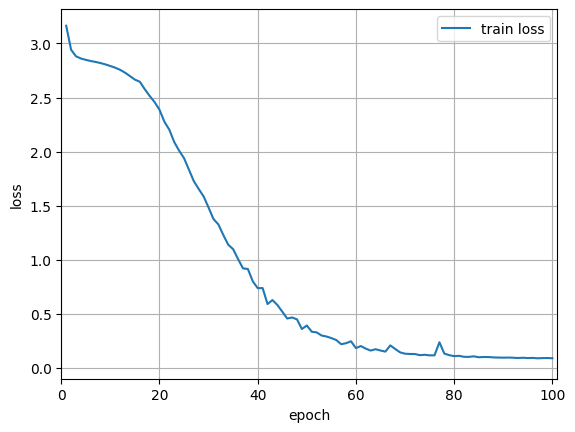

In [3]:
if True:
    ml.train(num_epochs=100,learning_rate=1) # 训练
    if True:
        torch.save(model.state_dict(), model_path)
elif Path(model_path).exists():
    model.load_state_dict(torch.load(model_path, map_location=device))